In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.stattools import acf
from scipy import signal
import statsmodels.api as sm
import random
import pymc3 as pm
% matplotlib inline

# Time Series Analysis

This notebook takes some concepts introduced in [Time Series and Its Applications](http://db.ucsd.edu/static/TimeSeries.pdf) text and explores those concepts with examples, plots, and simulations. 

    

### White Noise

White noise is data that is randomly sampled from a normal distribution $w_{t} \sim N(\mu = 0, \sigma^{2} = 1)$
The data samples are independent and identical. 

In [4]:
white_noise = np.random.normal(0,1,200)

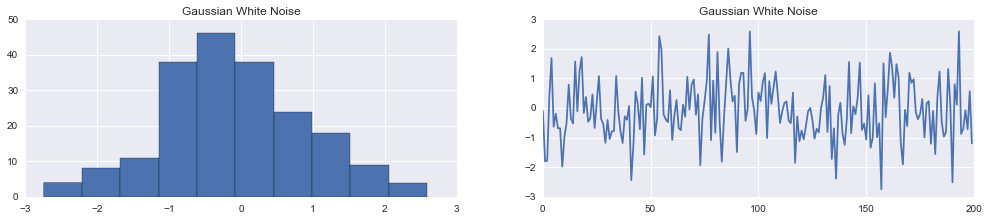

In [5]:
fig = plt.figure(figsize = (17,7))
fig.add_subplot(221)
plt.title("Gaussian White Noise")
plt.hist(white_noise);
fig.add_subplot(222)
plt.title("Gaussian White Noise")
plt.plot(white_noise);

### Moving Average

Using a moving window to take a locatl average of a immediate point with it's past and future neighbors. 

In [6]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [7]:
ma_data = moving_average(white_noise, n=5 )

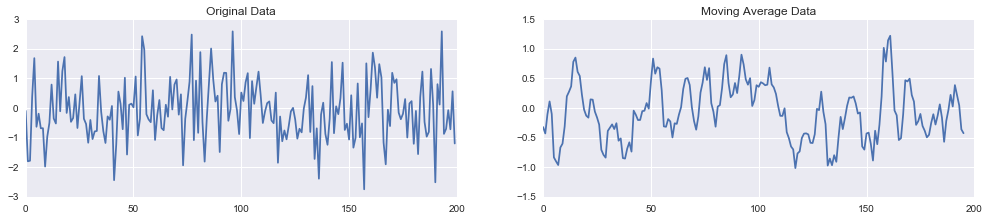

In [8]:
fig = plt.figure(figsize = (17,7))
fig.add_subplot(221)
plt.title("Original Data")
plt.plot(white_noise);
fig.add_subplot(222)
plt.title("Moving Average Data")
plt.plot(ma_data);

### Autoregression

Using past points to predict a current point. 

### Drift Random Walk

Adding gaussian white noise to a time series value $$x_{t} = \delta + x_{t-1} + w_{j}$$

$$x_{t} = \delta t + \sum_{j=1}^{t} w_{j}$$



In [9]:
def random_walk(data, noise, drift= 0):
    cumsum = 0 
    random_walk_data = []
    for x, w in zip(data, noise):
        cumsum += w
        random_walk_data.append(drift + x + cumsum)
        
    return random_walk_data

In [10]:
line =  np.linspace(0,200, 200) * .08

In [11]:
ts_rw = random_walk(line, white_noise, drift= 0)
ts_rw_drift = random_walk(line, white_noise, drift= 10)

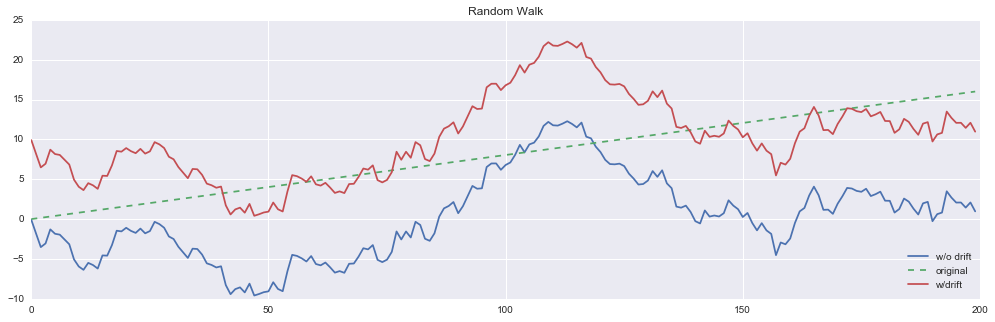

In [12]:
fig = plt.figure(figsize = (17,5))

plt.title("Random Walk")
plt.plot(ts_rw, label = "w/o drift");
plt.plot(line, '--', label = "original");
plt.plot(ts_rw_drift, label = "w/drift");
plt.legend(loc= "lower right");

### Signal in the Noise

Realistic models have an underlying periodic signal with noise.

In [13]:
def signal_with_noise(n_points, noise_variance, noise_on = False):
    
    def sinusoidal(t):
        return 2 * np.cos(2*np.pi*t/50. + .6*np.pi)
    
    noise = np.random.normal(0,noise_variance,n_points)
    data =  np.linspace(0,n_points, n_points) 
    signal_data = []
    
    if noise_on:
        for x, w in zip(data, noise):
            signal_data.append(sinusoidal(x) + w)
    else:
        for x in data:
            signal_data.append(sinusoidal(x))
            
    return signal_data

In [14]:
n_points = 200
cos_signal = signal_with_noise(n_points, 1)
noise_signal = signal_with_noise(n_points, 1, noise_on = True)
noiser_signal = signal_with_noise(n_points, 3 , noise_on = True)

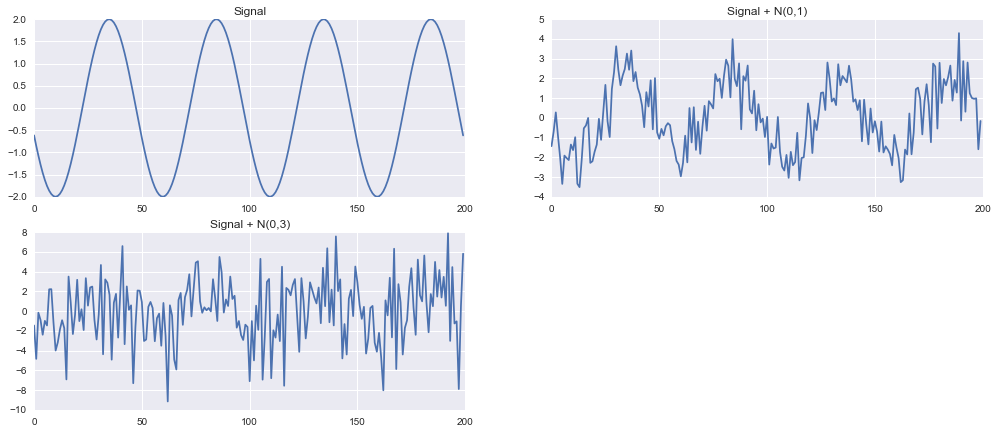

In [15]:
fig = plt.figure(figsize = (17, 7));
fig.add_subplot(221)
plt.title("Signal")
plt.plot(cos_signal);
fig.add_subplot(222)
plt.title("Signal + N(0,1)")
plt.plot(noise_signal);
fig.add_subplot(223)
plt.title("Signal + N(0,3)")
plt.plot(noiser_signal);

### Moving Average and White Noise

Because White Noise is normally distributed $N(\mu=0, \sigma_{w})$, the expectation value of white noise is zero, $E[w_{t}]~=~0$

A signal that is corrupted with white noise can be partially recovered by making a moving average of the series. Depending on how currupted the signal is, the widow of the average will have to be varied. 

In [16]:
noise_signal_ma = moving_average(noise_signal, n=10) 
noiser_signal_ma = moving_average(noiser_signal, n=14) 

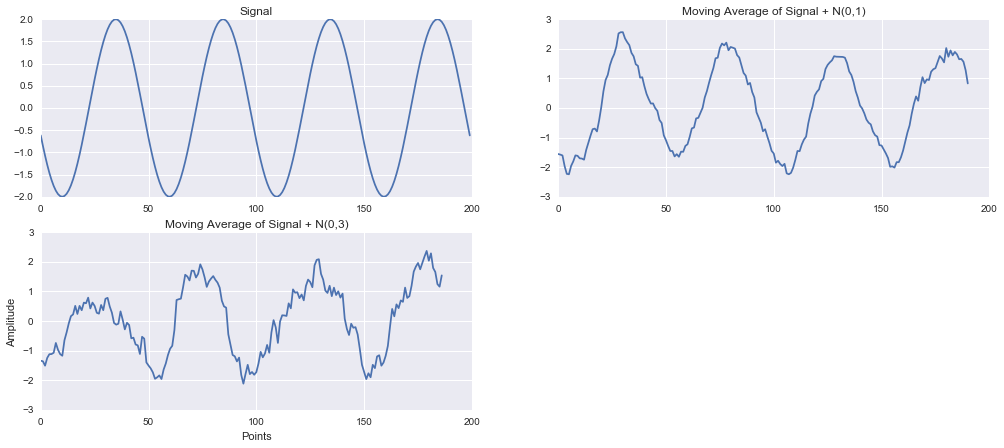

In [17]:
fig = plt.figure(figsize = (17, 7));
fig.add_subplot(221)
plt.title("Signal")
plt.plot(cos_signal);
fig.add_subplot(222)
plt.title("Moving Average of Signal + N(0,1)")
plt.plot(noise_signal_ma);
fig.add_subplot(223)
plt.title("Moving Average of Signal + N(0,3)")
plt.plot(noiser_signal_ma);
plt.xlabel("Points")
plt.ylabel('Amplitude');

The signal obscuring effect of $\sigma_{w}$ depends on the amplitude of the underlying signal.

$\textbf{Signal-to-Noise Ratio (SNR)}$

 The quotient between the signal's amplitude and the white noise's variance, $\sigma_{w}$ 

### Mean Function of Random Walk with Drift

$$x_{t} = \delta t + \sum_{j=1}^{t} E[w_{j}] = \delta t$$

Since the noise is gaussian, the expectation value of the noise is zero. So we see that Random Walk without noise is simply a line. 

### Mean Function of Signal Plus Noise

Practical applications depend on assuming the observed data have been generated by a fixed signal waveform superimposed on a zero- mean noise process, leading to an additive signal model of the form 

$$
\begin{aligned}
μ_{xt} &= E(x_{t}) \\
&= E [2 cos(2πt/50 + .6π) + w_{t}]  \\
&= 2 cos(2πt/50 + .6π) + E(w_{t}) \\
&= 2 cos(2πt/50 + .6π) \\
\end{aligned}
$$

### Weakly stationary time series, xt, is a finite variance process such that

1. The mean value function, $μ_{t} = constant$ and does not depend on time t
2. The autocovariance function, $γ(s, t)$, depends on s and t only through their difference $|s − t|$.

In [18]:
print "The mean is approximately the "
print np.mean(white_noise[0:50])
print np.mean(white_noise[50:100])
print np.mean(white_noise[100:150])

The mean is approximately the 
-0.262204509462
0.226669277361
-0.179184850816


The autocovariance of statinary white noise is $ \sigma^{2}$ for $h = 0$  and 0 for $h \neq 0 $

The autocorrelation conditions for statinary white noise approximately holds.


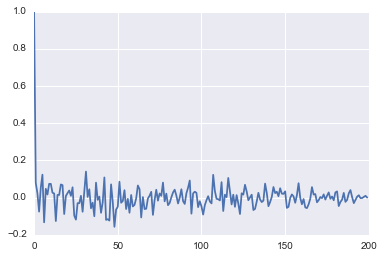

In [19]:
print "The autocorrelation conditions for statinary white noise approximately holds."
plt.plot(acf(white_noise, nlags = len(white_noise)));

### Linear Process

$$ x_{t} = \mu + \sum^{\inf}_{j = - /inf} \psi_{j} w_{t - j} ~, ~ w_{t} \sim N(\mu = 0, \sigma^{2} = 1)$$

Here the mean is zero and the noise coefficients are all 1.


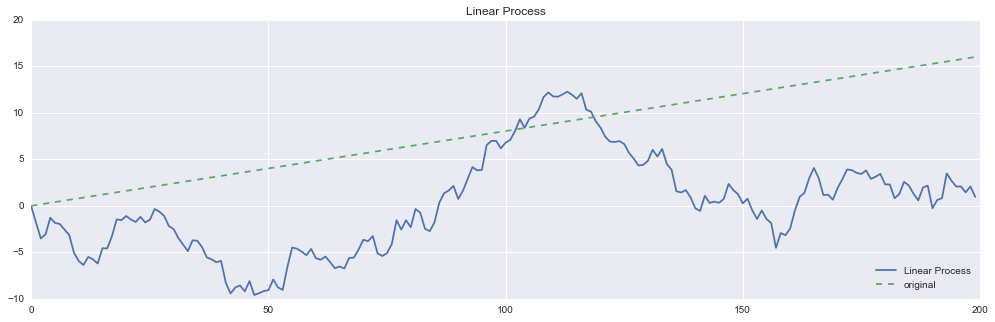

In [20]:
fig = plt.figure(figsize = (17,5))

plt.title("Linear Process")
plt.plot(ts_rw, label = "Linear Process");
plt.plot(line, '--', label = "original");
plt.legend(loc= "lower right");
print "Here the mean is zero and the noise coefficients are all 1."

## Cross Correlation

### Discrete Convolution
$$x[n] * h[n] = \sum_{k=0}^{\infty}h[k] \cdot x[n-k]$$

Sliding dot product of two functions, produces a modified version of one of the original functions. 

### Cross Correlation
$$x[n] * h[n] = \sum_{k=0}^{\infty}h[k] \cdot x[n+k]$$

A measure of similarity between two series, as a function of the lag of one relative to the other. 

### Notice

We can calcualte the CC using convolution by **reversing the order of the x series in the convolution.** 

$$x[n] * h[n] = \sum_{k=0}^{\infty} h[k] \cdot x[n-k]   = \sum_{j=0}^{\infty} h[j] \cdot \sum_{k=0}^{-\infty} x[n + k]  $$

We want to do this because it is a lot faster to compute a convolution than it is to compute a cross correlation. 

In [21]:
def generate_offset_signals(data_length):
    '''Generates two signals. A short normal random signal
       and a long signal that has the short signal embeded
       and padded with zeros.'''
    # random series, x is normally distributed
    # x[0:1000]
    x = np.random.randn(data_length)
    # random sereis, y is twice a long as x 
    # y[0:2000]
    y = np.zeros(data_length * 2)

    # This works for data_length being even
    # y[ 500 : 500 + 1000]
    # we are copying a smaller signal in the middle of a larger signal 
    y[data_length/2 : data_length/2+data_length] = x 
    return x, y

In [22]:
def corralate_signal(y, x, mode_):
    '''Computes the Cross-correlation of two signles by computing 
       the fast fourier transfrom. One of the two single's order 
       is reversed.'''

    # Do an array flipped convolution, which is a correlation.
    x_reverse =  x[::-1]

    # "Valid", The output consists only of those elements that do not rely on the zero-padding.
    corrlate_data = signal.fftconvolve(y, x_reverse, mode=mode_)
    lags = np.linspace(-len(x), len(x), (len(x)))
        
    return corrlate_data, lags

In [23]:
# num of points
data_length = 1000
# generate a short signal and a long signal from gaussian white noise 
# embeded the short signal within the long signal
x, y = generate_offset_signals(data_length)
# calculate the cross correlation
cross_corr, _ = corralate_signal(y, x, "valid")
auto_corr, lags_auto = corralate_signal(x, x, 'same')

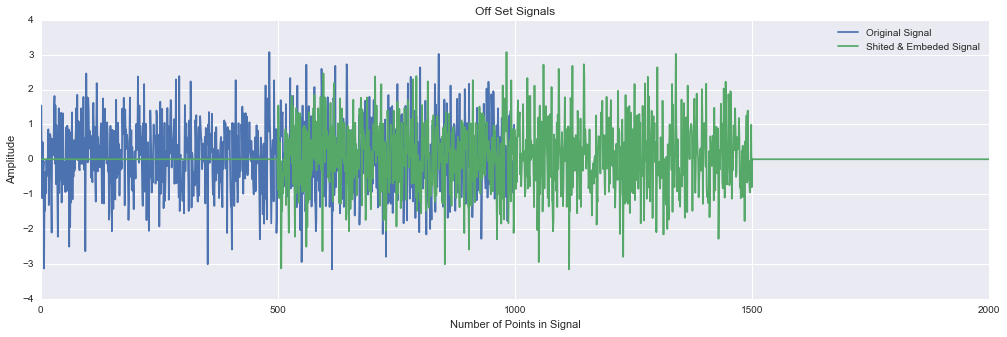

In [24]:
fig = plt.figure(figsize = (17,5))
plt.plot(x, label="Original Signal");
plt.plot(y, label="Shited & Embeded Signal");
plt.xlabel("Number of Points in Signal");
plt.ylabel("Amplitude");
plt.title("Off Set Signals")
plt.legend();

The green signal lags the blue signal by 500 time steps. Converse, the blue signal leads the green signal by 500 time steps. The signals are white noise centered around $\mu = 0$.


### Large Sample Distribution for ACF and CCF

**Standard Deviation for White Noise Sample Points**
$$\sigma_{\rho_{x(h)}} = \sigma_{\rho_{xy}} = \frac{1}{\sqrt n}$$

Let's include $2\sigma$ White Noise bars in the CCF plot below. In a normal distribution, 95% of points will exist between $2\sigma$ of the mean, while only 2.5% of points will exist $2\sigma$ above or $2\sigma$ below the mean. These standard deviation bars will help clarify which results are noise and which are are not noise. 

In [26]:
white_nose_sample_standard_deviation = 2/np.sqrt(1000.)
two_sigma = [white_nose_sample_standard_deviation]*1000

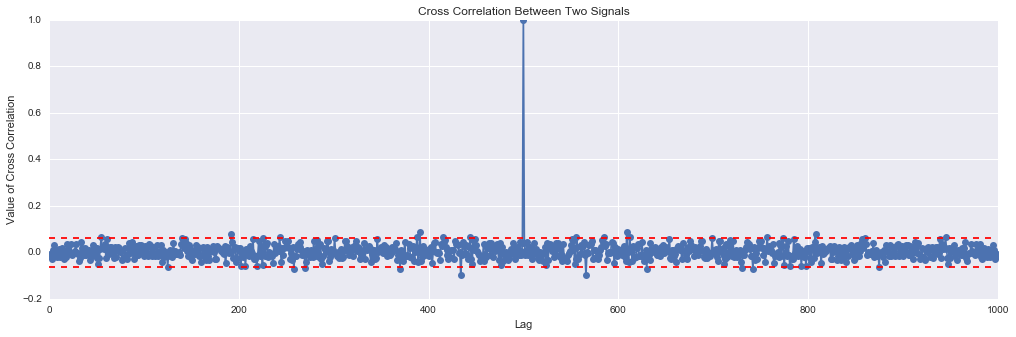

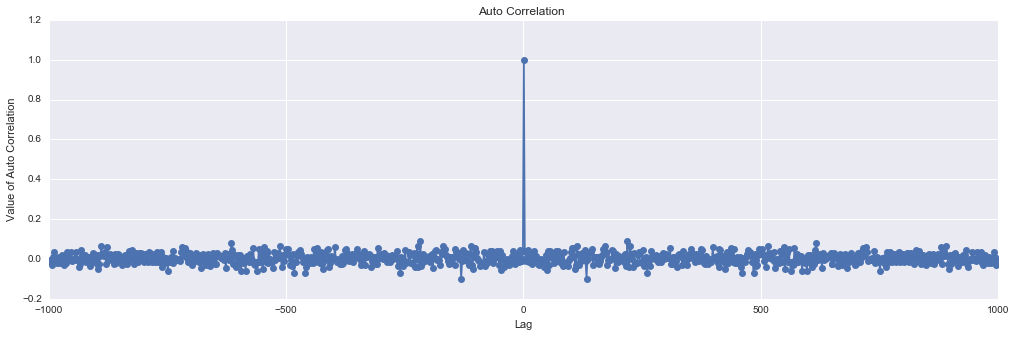

In [27]:
fig = plt.figure(figsize = (17,5))
plt.xlabel("Lag");
plt.ylabel("Value of Cross Correlation");
plt.title("Cross Correlation Between Two Signals")
plt.plot(cross_corr/len(cross_corr), '-o');
plt.plot(two_sigma, 'r--')
plt.plot(-1*np.array(two_sigma), 'r--')

fig = plt.figure(figsize = (17,5))
plt.xlabel("Lag");
plt.ylabel("Value of Auto Correlation");
plt.title("Auto Correlation ")
plt.plot(lags_auto, auto_corr/len(auto_corr), '-o');

Both the Cross correlation plot show near zero correlation for all lags expect h = 500. This is because the long signal is made of the short signal shifted by 500 steps and padded with zeros on both sides. So when the convolution (cross correlation) is calculated for a lag of 500, there is a perfect match hence a correlation of 1. 

The Auto correlation plots shows perfect correlation at a lag of 0 (which is expected). Any time lags before or after zero and the signal is not correlated. 

Recall that the Autovariance properties of white noise is $\sigma_{w}^{2}$ at $h~=~0$ and $0$ for h $\neq 0$. 
Although the Autocorrelation is a normalized realization of the Autovariance, we can see that Autovariance properties still hold. 


## Types of Noise

Up until now, we've looked at White Noise $N(\mu=0, \sigma_{w}^{2})$. Now we'll look at other forms of noise and their properties. 

### Uncorrelated Uniform Noise

$$P(x) = \frac{1}{b-a},~\text{where b > a}$$

Every point is independent of all other points and is equally likely to be sampled from the distribution. In other words, each point is **Independent and Identically Distributed (iid)**.

In [28]:
def UncorrelatedUniformNoise(t_start, t_end, n_points):
    return np.random.uniform(t_start, t_end, n_points)

In [29]:
t_start, t_end, n_points = -1, 1, 1000
uniform_noise = UncorrelatedUniformNoise(t_start, t_end, n_points)

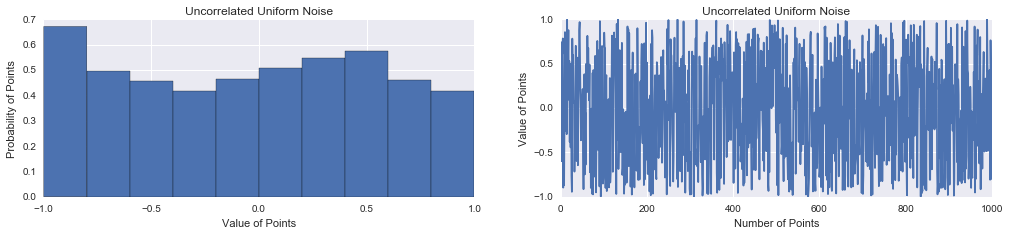

In [30]:
fig = plt.figure(figsize = (17,7))
fig.add_subplot(221)
plt.title("Uncorrelated Uniform Noise")
plt.hist(uniform_noise,normed=True);
plt.xlabel('Value of Points')
plt.ylabel("Probability of Points")
fig.add_subplot(222)
plt.title("Uncorrelated Uniform Noise")
plt.plot(uniform_noise)
plt.xlabel('Number of Points')
plt.ylabel("Value of Points");

### Brownian Noise


A Brownian motion  is obtained as the **integral of a white noise signal**, 

$$  W(t)=\int _{{0}}^{{t}}   dW(t), ~\text{where}~~W_{t} \sim N(\mu = 0, \sigma^{2} )      $$





Brownian noise or red noise, is the kind of signal **noise produced by Brownian motion**, hence its **alternative name is random walk noise**. 

The term "red noise" comes from the "white noise"/"white light" analogy; red noise is strong in longer wavelengths, similar to the red end of the visible spectrum

In [31]:
def BrownianNoise(sigma, n_points):
    mu = 0
    white_noise = np.random.normal(mu,sigma,n_points)
    return np.cumsum(white_noise)

In [32]:
sigma, n_points = 1, 1000
brownian_noise = BrownianNoise(sigma, n_points)

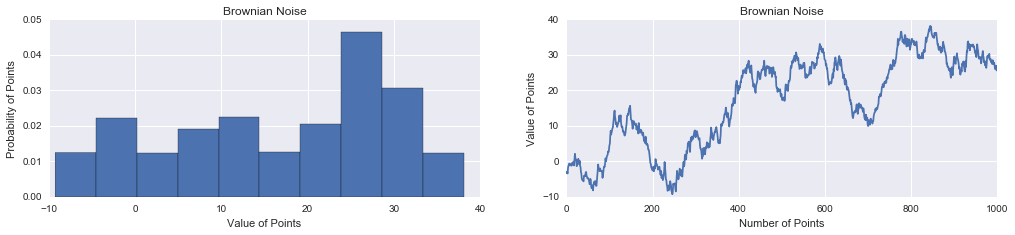

In [33]:
fig = plt.figure(figsize = (17,7))
fig.add_subplot(221)
plt.title("Brownian Noise")
plt.hist(brownian_noise,normed=True);
plt.xlabel('Value of Points')
plt.ylabel("Probability of Points")
fig.add_subplot(222)
plt.title("Brownian Noise")
plt.plot(brownian_noise)
plt.xlabel('Number of Points')
plt.ylabel("Value of Points");

## Time Series Regression

In [15]:
df = pd.read_csv('./data/birth.txt')

In [35]:
dates = pd.date_range(start="1980", end = "2011", freq="M")
df["date"] =  dates
df["months"] = pd.DatetimeIndex(df['date']).month
df=df.set_index('date')

In [36]:
df.head()

,num_births,months
date,,
1980-01-31,295,1
1980-02-29,286,2
1980-03-31,300,3
1980-04-30,278,4
1980-05-31,272,5


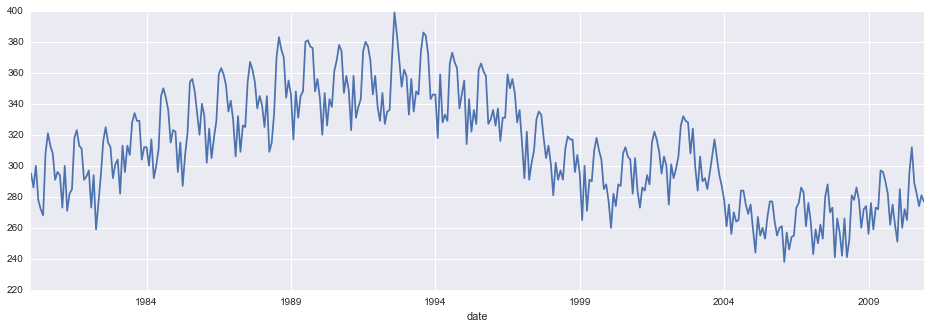

In [37]:
ts = pd.Series(df['num_births'])
ts.plot(figsize=(16,5));

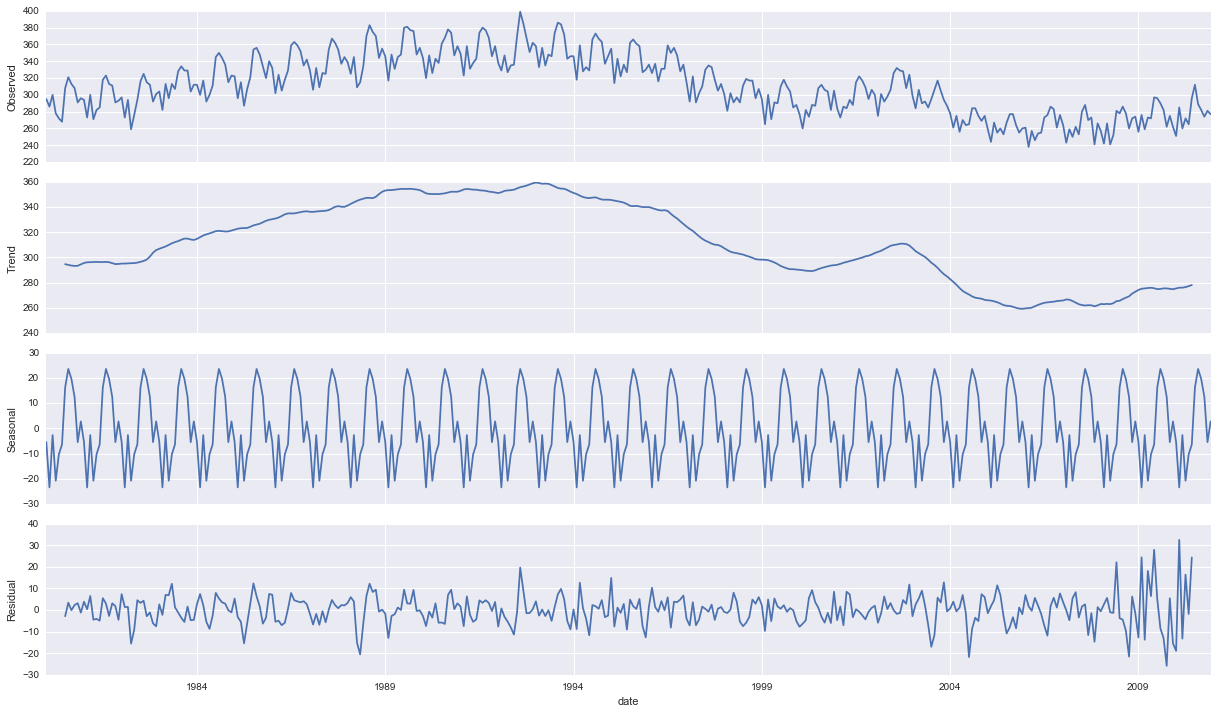

In [66]:
fig = sm.tsa.seasonal_decompose(ts).plot()
fig.set_size_inches((17,10))
fig.tight_layout()

#### Trends
$$x_{t} = μ_{t} + y_{t}$$ where $x_{t}$ are the observations, $μ_{t}$ denotes the trend, and $y_{t}$ is a stationary process. 
$$y_{t} = x_{t} - μ_{t}$$
The idea is to subtract the trend from the observation by simply taking a differnece. 



# Imputing Time Seris Data

It is often the case that sensors will malfunction, resulting in missing or noise values. We will look at two different techniques in an attempt to smooth noise data and impute missing values:
    1. Rolling Average
    2. Markov Chain Monte Carlo 

In [89]:
def generate_singal(Time):
    '''
    Return sinusoidal data that is corrupted by either  near power failure of the senor 
    or additonal white noise'''
    
    corrupted_signal = []
    original_signal = []
    # one full period is 2*lambda_ points
    lambda_ = 50
    # angle off set
    phi = .6 * 2*np.pi
    # amplutide of the signal
    amp = 5
    # radians of period
    full_circle_period = 2*np.pi
    # white noise parameters
    mu = 0
    sigma = 3
    # shift signal away from zero
    vertical_shift = 10
    
    random.seed(124)
    np.random.seed(124)
    
    for t in Time:
        
        # white nosie
        w_noise = random.gauss(mu , sigma)
        # signal sample
        o_signal = amp * np.cos( full_circle_period*t/lambda_ + phi) + vertical_shift
        c_signal =  amp * np.cos( full_circle_period*t/lambda_ + phi) + vertical_shift + w_noise
        # additional noise
        w_noise = random.gauss(mu = 30 , sigma = 3)
        # three possible values are chosen by probability
        # original signal, low amplutiude signal + noise, noise
        possible_values = [c_signal, 0.1*(c_signal+ w_noise), 0.1*w_noise]
        
        # probabilstically choose sample a value
        prob_anomalies = np.random.choice(possible_values, 
                                          size = 1, 
                                          replace=False, 
                                          p=[.97, .015, .015])
        
        # probabilstically choose signal or missing value
        prob_missingValue =  np.random.choice([1,0],
                                          size = 1, 
                                          replace=False, 
                                          p=[.85, .15])
        
        if prob_missingValue == 1:
            corrupted_signal.append(prob_anomalies[0])
        else:
            corrupted_signal.append(None)
            
        original_signal.append(o_signal)

    return np.array(corrupted_signal), np.array(original_signal)

## Original Signal
The uncorrupted signal is a smooth sinusoidal curve, centered around 10 kWh. The symmetry of the cruve can been seen in the plot as well as in the histogram. 

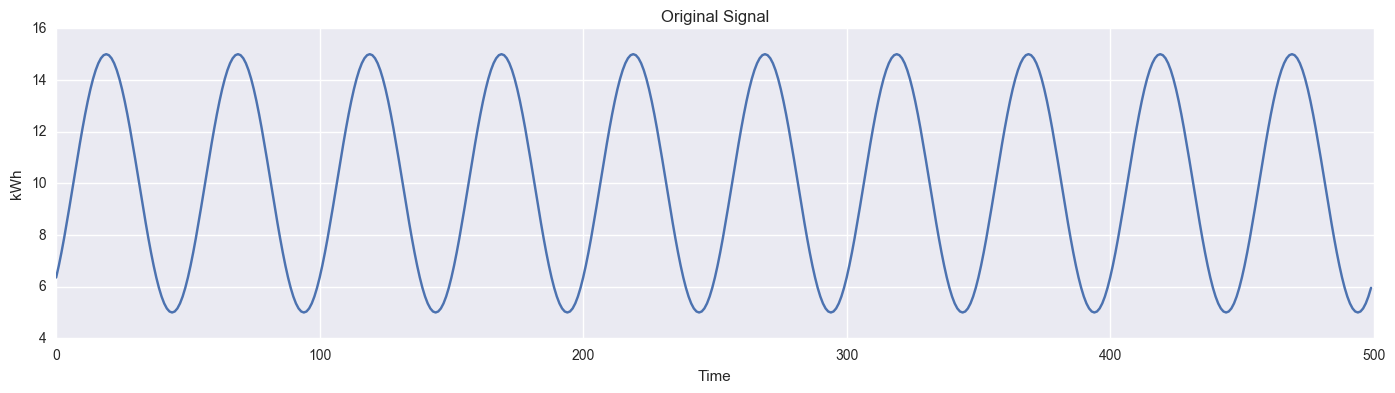

In [109]:
original_signal
plt.figure(figsize = (17, 4))
plt.title("Original Signal")
plt.ylabel("kWh")
plt.xlabel("Time")
plt.plot(original_signal[:500]);

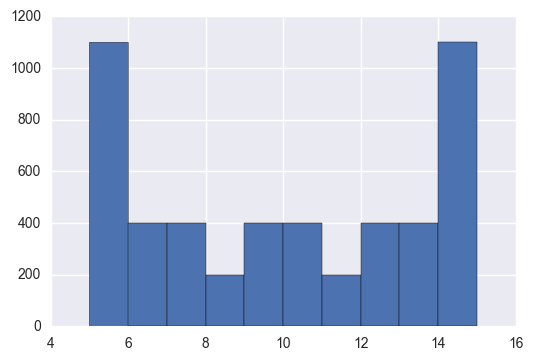

In [117]:
plt.hist(original_signal);

## Synthetic Corrupted Signal

The generated signal has been corrupted by missing vlaues, anomilies, and white noise. Our job is to find a way to impute those missing values and remove the anomilies in order to recover as much of the original signal as possible. 

In [91]:
# get data
Time = list(range(1, 5000))
signal, original_signal = generate_singal(Time)

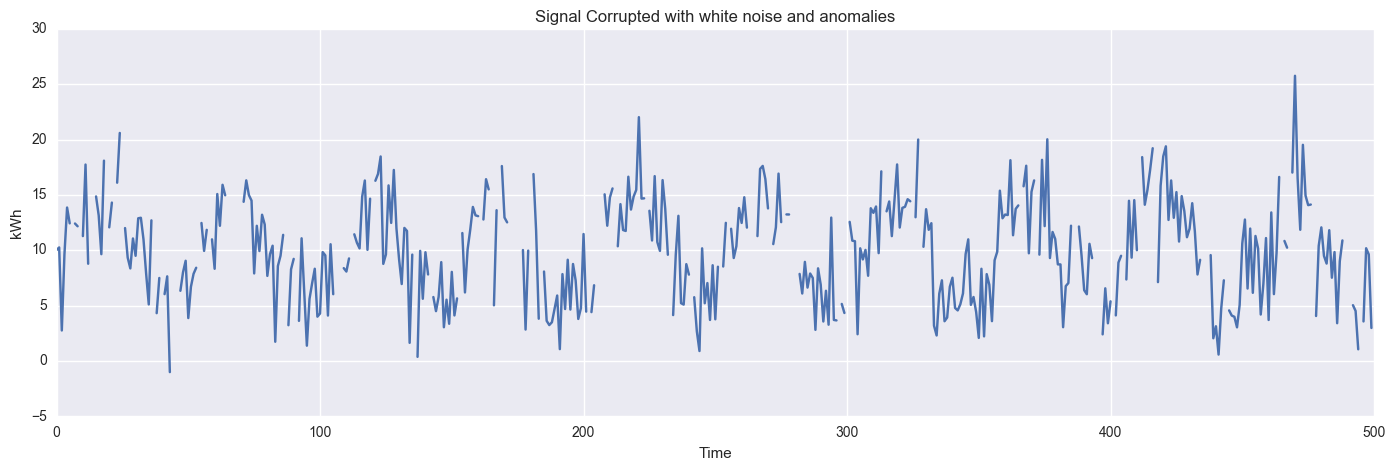

In [47]:
plt.figure(figsize = (17, 5))
plt.title("Signal Corrupted with white noise and anomalies")
plt.ylabel("kWh")
plt.xlabel("Time")
plt.plot(signal[:500]);

The kWh vs. time plot shows the extent of the signal's corruption by noise and missing values. The histogram of the signal strongly suggest that the data normally distributed. This is the result of the white noise, which is sampled from a normal distribution. We can also see that the distribution is slighly skewed toward lower values.

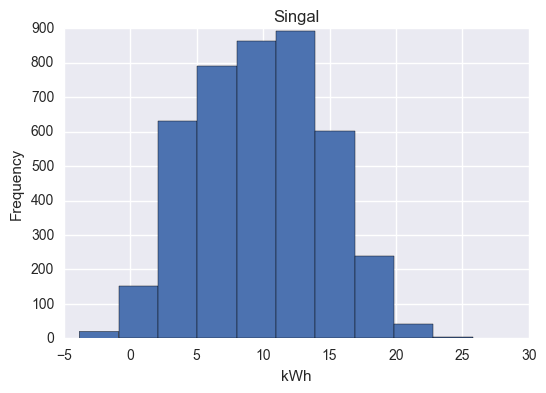

In [121]:

pd.DataFrame([ np.NaN   if sig == None else sig for sig in signal]).hist()
plt.title("Singal")
plt.ylabel("Frequency");
plt.xlabel("kWh");

## 1. Rolling Mean

By applying a rolling mean on the data, we can smooth away the anomilies and replaced the missing values with local averages. 

In [144]:
df = pd.DataFrame(signal)
smooth_singal = df.rolling(window = 5, min_periods=1).mean().values

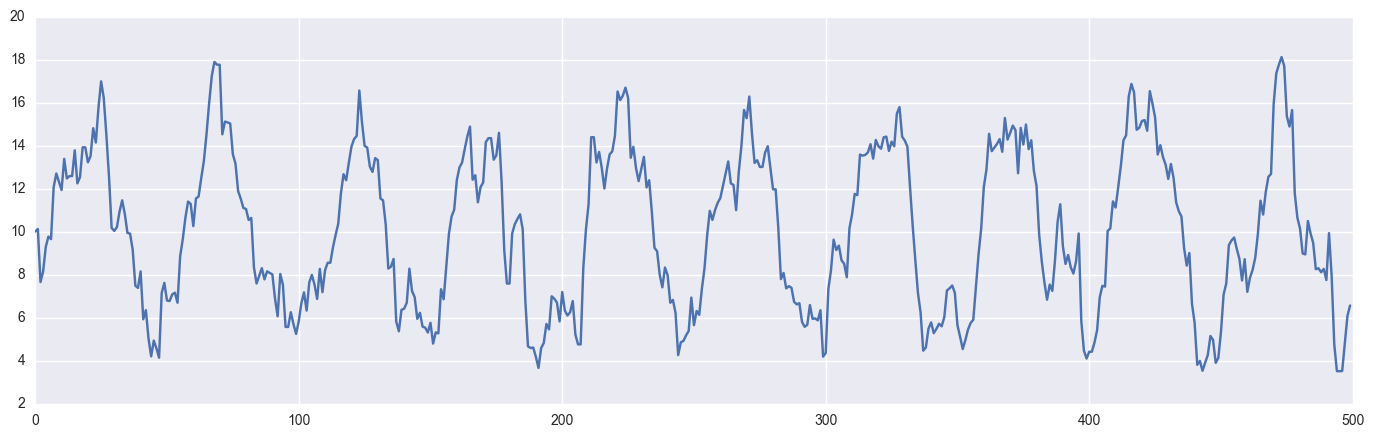

In [149]:
plt.figure(figsize = (17, 5))
plt.plot(smooth_signal[0:500]);

The simple rolling mean has filled in the missing values and smoothed the anomilies, we can see from the histogram that the resulting distribution becomes bimodial. 

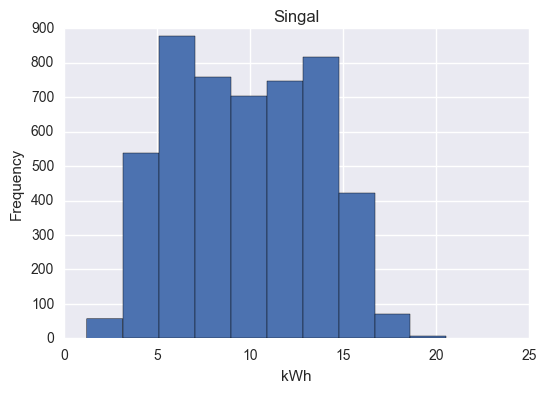

In [145]:
plt.hist(smooth_singal);
plt.title("Singal")
plt.ylabel("Frequency");
plt.xlabel("kWh");

## 2. Imputing with MCMC

In [6]:
import pymc as pm
from pymc import Normal, Gamma, deterministic, MCMC, Matplot

In [35]:
def missing_data_model():

    switch = Normal("prior", mu = 10, tau = 1/5)

    masked_values = np.ma.masked_values(signal, value=None)
    
    # Pass masked array to data stochastic, and it does the right thing
    disasters =Normal("missing_data", mu = switch,  tau = 1/5, value=masked_values, observed=True)
    
    return locals()

In [146]:
M_missing = MCMC(missing_data_model())
M_missing.sample(10000)

/Users/Alexander/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:3117: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dout = self.data[indx]


 [-----------------100%-----------------] 10000 of 10000 complete in 4.9 sec

In [152]:
signal_imputed = M_missing.disasters.get_value()

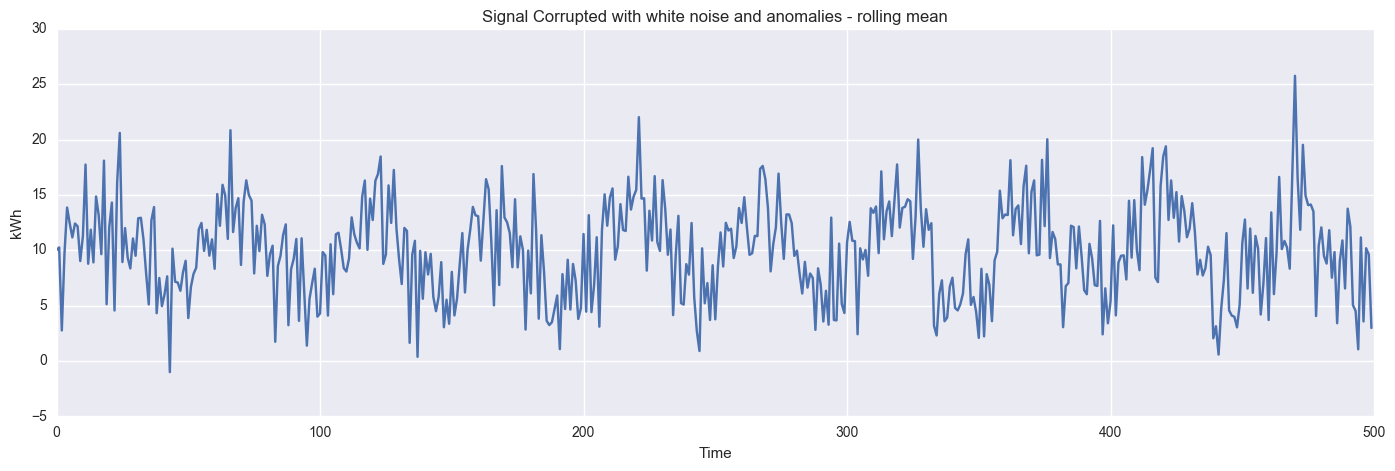

In [153]:
plt.figure(figsize = (17, 5))
plt.title("Signal Corrupted with white noise and anomalies - MCMC Inputed")
plt.ylabel("kWh")
plt.xlabel("Time")
plt.plot(signal_imputed[:500]);

We can see that the imputing, to the naked eye, has imputed the values and the resulting curve appears correct. 

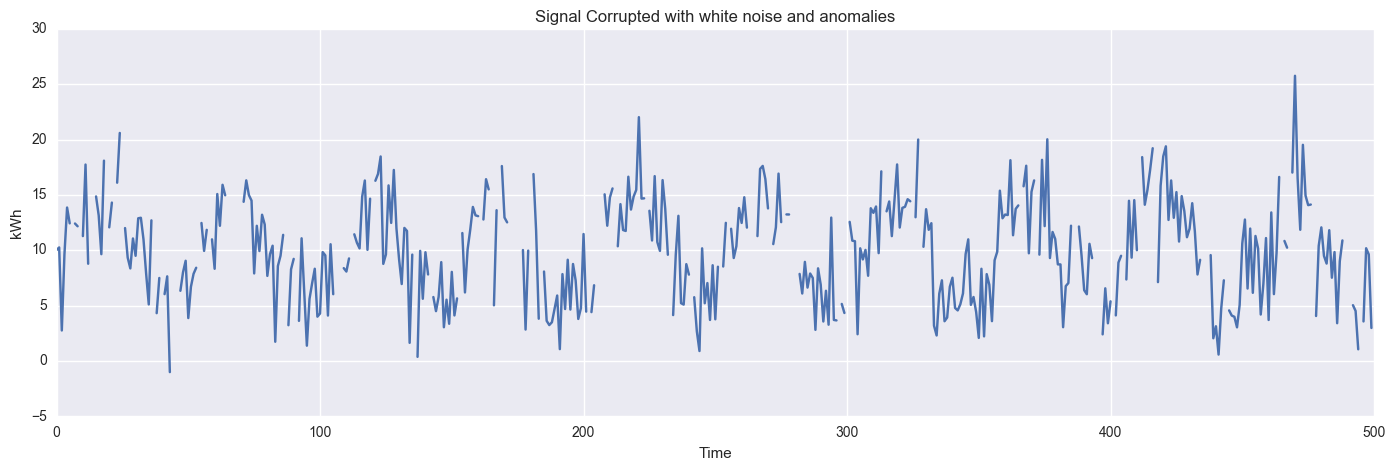

In [154]:
plt.figure(figsize = (17, 5))
plt.title("Signal Corrupted with white noise and anomalies")
plt.ylabel("kWh")
plt.xlabel("Time")
plt.plot(signal[:500]);

The histogram of the imputed data is normal, as is the corrupted data's histogram. We can see that the imputation has nearly eliminated the skew that we saw in the corrupted data's distribution. 

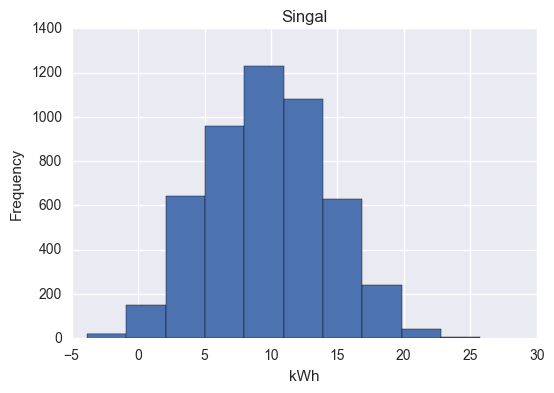

In [41]:
plt.hist(M_missing.disasters.get_value())
plt.title("Singal")
plt.ylabel("Frequency");
plt.xlabel("kWh");

## Validate Techniques
In order to determine with approach did a better job of recovering the original signal, we are calculate the cuminative differences between the original signal and resulting signals from the two approachs. First we can going to smooth the imputed data. This menas that we are comparing the effectiveness of replacing missing values with rolling averages and imputing missing values using MCMC (we will use the same window). 

In [156]:
df = pd.DataFrame(signal_imputed)
smooth_singal_imputed = df.rolling(window = 5, min_periods=1).mean().values

In [168]:
def get_cum_error(A, B):
    '''Return the cumulative error between the smooth and original signal'''
    return np.sum([  abs(a - b)  for a, b in zip(A,B)])

In [169]:
rolling_error = get_cum_error(smooth_signal, original_signal)
mcmc_error = get_cum_error(smooth_signal, smooth_singal_imputed)

We can see that imputing the data using MCMC is clearly more effective at recovering the original signal. 

In [170]:
print ("Rolling Error {0:.6}, MCMC Error {1:.6}, Ratio  {2:.3}"\
       .format(rolling_error, mcmc_error, rolling_error/mcmc_error))

Rolling Error 7344.36, MCMC Error 2845.15, Ratio  2.58
